In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('/Volumes/Macintosh EXT/Partition B/Coursera/Applied Data Science Capstone/Data-Collisions.csv')
df.head()

/Users/tl/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.drop( [ 'X' , 'Y' , 'OBJECTID' , 'INCKEY' , 'COLDETKEY' , 'REPORTNO' ] , axis = 1 , inplace = True )
df.drop( [ 'STATUS' , 'INTKEY' , 'LOCATION' , 'EXCEPTRSNCODE' , 'EXCEPTRSNDESC' , 'SEVERITYCODE.1' ] , axis = 1 , inplace = True )
df.drop( [ 'SEVERITYDESC' , 'COLLISIONTYPE' , 'INCDATE' , 'INCDTTM' ] , axis = 1 , inplace = True )
df.drop( [ 'SDOT_COLCODE' , 'SDOT_COLDESC' , 'PEDROWNOTGRNT' , 'SDOTCOLNUM' , 'ST_COLCODE' , 'ST_COLDESC' , 'SEGLANEKEY' , 'CROSSWALKKEY' , 'HITPARKEDCAR' ] , axis = 1 , inplace = True )
df.drop( 'JUNCTIONTYPE' , axis = 1 , inplace = True )
df.head(10)

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN
5,1,Intersection,2,0,0,2,NaN,N,Clear,Dry,Daylight,NaN
6,1,Intersection,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN
7,2,Intersection,3,0,1,1,NaN,N,Clear,Dry,Daylight,NaN
8,1,Block,2,0,0,2,NaN,0,Clear,Dry,Daylight,NaN
9,2,Intersection,2,0,0,2,NaN,0,Clear,Dry,Daylight,NaN


In [15]:
df[ 'ADDRTYPE' ].dropna( axis = 0 ,how = 'any' , inplace = True )
df[ 'ADDRTYPE' ].replace(to_replace=[ 'Alley' , 'Block' , 'Intersection' ] , value = [ 0 , 1 , 2 ] , inplace = True )
df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,0,0,2,0,N,Overcast,Wet,Daylight,0
1,1,1,2,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,1,4,0,0,3,0,0,Overcast,Dry,Daylight,0
3,1,1,3,0,0,3,0,N,Clear,Dry,Daylight,0
4,2,2,2,0,0,2,0,0,Raining,Wet,Daylight,0


In [19]:
df[ 'INATTENTIONIND' ].fillna( 0 , inplace = True )
df[ 'INATTENTIONIND' ].replace(to_replace=[ '0' , 'Y' ] , value = [ 0 , 1 ] , inplace = True )
df.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [20]:
df[ 'UNDERINFL' ].dropna( axis = 0 , how = 'any' , inplace = True )
df[ 'UNDERINFL' ].replace(to_replace=[ 'N' , '0' , '1' , 'Y' ] , value = [ 0 , 0 , 1 , 1 ] , inplace = True )
df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,0,0,2,0,0,Overcast,Wet,Daylight,0
1,1,1,2,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,1,4,0,0,3,0,0,Overcast,Dry,Daylight,0
3,1,1,3,0,0,3,0,0,Clear,Dry,Daylight,0
4,2,2,2,0,0,2,0,0,Raining,Wet,Daylight,0


In [21]:
df[ 'WEATHER' ].dropna( axis = 0 , how = 'any' , inplace = True )
df[ 'WEATHER' ].replace(to_replace=[ 'Unknown' , 'Other' , 'Overcast' , 'Raining' , 'Clear' , 'Snowing' , 'Fog/Smog/Smoke' , 'Sleet/Hail/Freezing Rain' , 'Blowing Sand/Dirt' , 'Severe Crosswind' , 'Partly Cloudy'] , value = [ 0 , 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ] , inplace = True )
df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,0,0,2,0,0,1,Wet,Daylight,0
1,1,1,2,0,0,2,0,0,2,Wet,Dark - Street Lights On,0
2,1,1,4,0,0,3,0,0,1,Dry,Daylight,0
3,1,1,3,0,0,3,0,0,3,Dry,Daylight,0
4,2,2,2,0,0,2,0,0,2,Wet,Daylight,0


In [22]:
df[ 'ROADCOND' ].dropna( axis = 0 ,how = 'any' , inplace = True )
df[ 'ROADCOND' ].replace(to_replace=[ 'Unknown' , 'Other' , 'Wet' , 'Dry' , 'Snow/Slush' , 'Ice' , 'Sand/Mud/Dirt' , 'Standing Water' , 'Oil'] , value = [ 0 , 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] , inplace = True )
df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,0,0,2,0,0,1,1,Daylight,0
1,1,1,2,0,0,2,0,0,2,1,Dark - Street Lights On,0
2,1,1,4,0,0,3,0,0,1,2,Daylight,0
3,1,1,3,0,0,3,0,0,3,2,Daylight,0
4,2,2,2,0,0,2,0,0,2,1,Daylight,0


In [23]:
df[ 'LIGHTCOND' ].dropna( axis = 0 ,how = 'any' , inplace = True )
df[ 'LIGHTCOND' ].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights', 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other','Dark - Unknown Lighting'] , value = [ 1 , 2 , 3 , 0 , 4 , 5 , 6 , 0 , 7 ] , inplace = True )
df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,0,0,2,0,0,1,1,1,0
1,1,1,2,0,0,2,0,0,2,1,2,0
2,1,1,4,0,0,3,0,0,1,2,1,0
3,1,1,3,0,0,3,0,0,3,2,1,0
4,2,2,2,0,0,2,0,0,2,1,1,0


In [25]:
df[ 'SPEEDING' ].fillna( 0 , inplace = True )
df[ 'SPEEDING' ].replace(to_replace=[ '0' , 'Y' ] , value = [ 0 , 1 ] , inplace = True )
df.dropna( axis = 0 , how = 'any' , inplace = True )
df.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [26]:
Feature = df[[ 'ADDRTYPE' , 'PERSONCOUNT' , 'PEDCOUNT' , 'PEDCYLCOUNT' , 'VEHCOUNT' , 'INATTENTIONIND' , 'UNDERINFL' , 'WEATHER' , 'ROADCOND' , 'LIGHTCOND' , 'SPEEDING' ]]
X = Feature
y = df[ 'SEVERITYCODE' ]

In [27]:
X.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,0,0,2,0,0,1,1,1,0
1,1,2,0,0,2,0,0,2,1,2,0
2,1,4,0,0,3,0,0,1,2,1,0
3,1,3,0,0,3,0,0,3,2,1,0
4,2,2,0,0,2,0,0,2,1,1,0


In [28]:
y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.38620406, -0.34080218, -0.19079929, -0.17265505,  0.05282407,
        -0.43284588, -0.22541819, -1.28999989, -0.91352486, -0.41274457,
        -0.22799242],
       [-0.69662849, -0.34080218, -0.19079929, -0.17265505,  0.05282407,
        -0.43284588, -0.22541819, -0.30316318, -0.91352486,  0.66313602,
        -0.22799242],
       [-0.69662849,  1.12982231, -0.19079929, -0.17265505,  1.84023553,
        -0.43284588, -0.22541819, -1.28999989,  0.55823772, -0.41274457,
        -0.22799242],
       [-0.69662849,  0.39451007, -0.19079929, -0.17265505,  1.84023553,
        -0.43284588, -0.22541819,  0.68367353,  0.55823772, -0.41274457,
        -0.22799242],
       [ 1.38620406, -0.34080218, -0.19079929, -0.17265505,  0.05282407,
        -0.43284588, -0.22541819, -0.30316318, -0.91352486, -0.41274457,
        -0.22799242]])

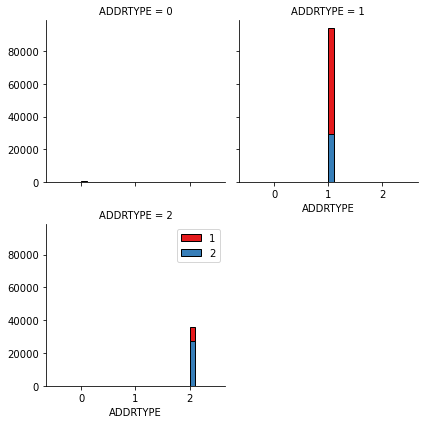

In [35]:
import seaborn as sns

g = sns.FacetGrid(df, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADDRTYPE', ec="k")

g.axes[-1].legend()
plt.show()

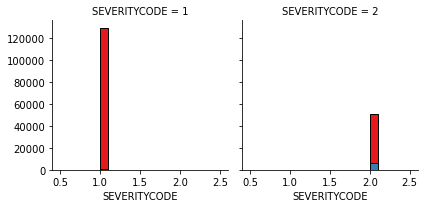

In [49]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="PEDCOUNT", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', ec="k")

#g.axes[-1].legend()
plt.show()

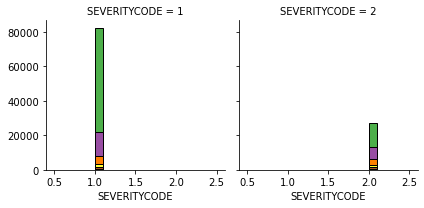

In [50]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="PERSONCOUNT", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', ec="k")

#g.axes[-1].legend()
plt.show()

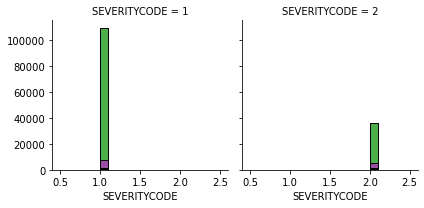

In [51]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="VEHCOUNT", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', ec="k")

#g.axes[-1].legend()
plt.show()

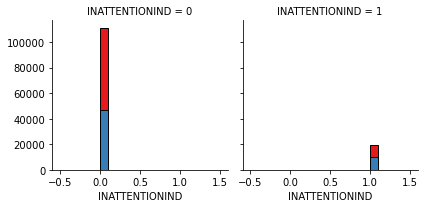

In [53]:
g = sns.FacetGrid(df, col="INATTENTIONIND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'INATTENTIONIND', ec="k")

#g.axes[-1].legend()
plt.show()

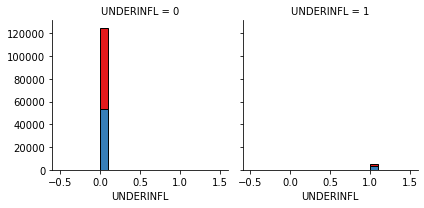

In [54]:
g = sns.FacetGrid(df, col="UNDERINFL", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'UNDERINFL', ec="k")

#g.axes[-1].legend()
plt.show()

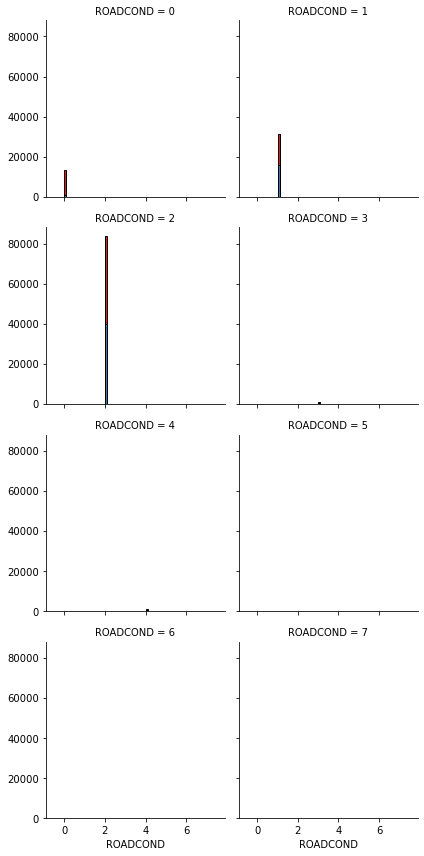

In [61]:
g = sns.FacetGrid(df, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ROADCOND' , ec="k")

#g.axes[-1].legend()
plt.show()

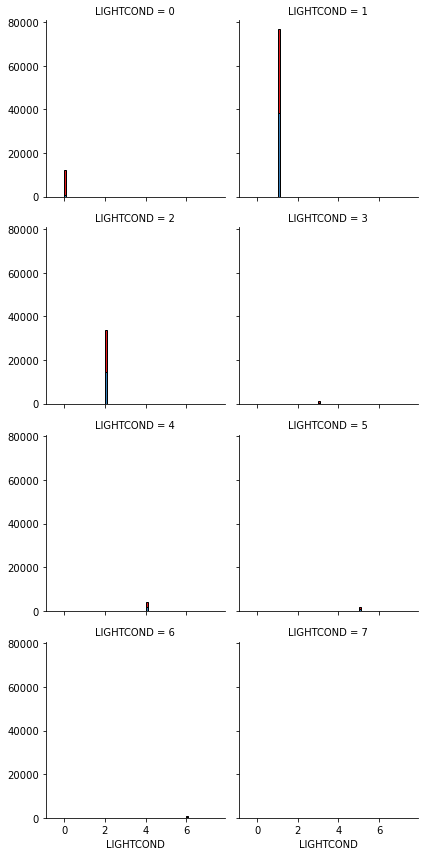

In [62]:
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'LIGHTCOND', ec="k")

#g.axes[-1].legend()
plt.show()

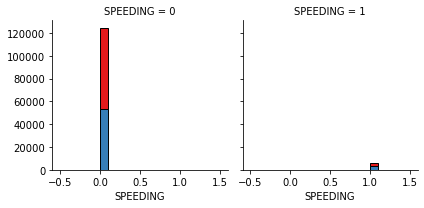

In [63]:
g = sns.FacetGrid(df, col="SPEEDING", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SPEEDING', ec="k")

#g.axes[-1].legend()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (150020, 11) (150020,)
Test set: (37505, 11) (37505,)


In [67]:
from sklearn.neighbors import KNeighborsClassifier
Ks=25
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks): 
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

KeyboardInterrupt: 

In [66]:
std_acc

array([0.00244839, 0.00233009, 0.00241348, 0.00227912, 0.00233414,
       0.00228131, 0.00230779, 0.00226793, 0.00229985, 0.00228262,
       0.00228949, 0.00225134, 0.00225088, 0.00224316, 0.00225165,
       0.00223867, 0.00224159, 0.0022401 , 0.00224151, 0.00223598,
       0.00223788, 0.00223852, 0.00224309, 0.00223071])

In [69]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [71]:
yhat = DT_model.predict(X_test)
mean_acc=np.mean(yhat==y_test)
std_acc=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( mean_acc )
print( std_acc )

0.7502199706705772
0.0022352627543070426


In [81]:
yhat[1:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [83]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [84]:
yhat = SVM_model.predict(X_test)
mean_acc=np.mean(yhat==y_test)
std_acc=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( mean_acc )
print( std_acc )

0.7538461538461538
0.002224334458415822


In [85]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [86]:
yhat = LR_model.predict(X_test)
mean_acc=np.mean(yhat==y_test)
std_acc=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( mean_acc )
print( std_acc )

0.7495800559925343
0.00223716946766595
